# Regression: Cardiovascular Disease Prediction

## Table of Contents

- **[Introduction](#introduction)**
    - [Project Objectives](#project-objectives)
    - [Data Brief](#data-brief)
    - [Required Modules](#required-modules)
    - [Load the Dataset](#load-the-dataset)
- **[Data Cleaning](#data-cleaning)**
    - [Dropping unnecessary columns](#dropping-unnecessary-columns)
    - [Data Info](#data-info)
    - [Missing Values](#missing-values)
    - [Duplicate Values](#duplicate-values)
- **[Exploratory Data Analysis (EDA)](#eda)**
    - [Distribution of Coronary Heart Disease Counts](#distribution-of-coronary-heart-disease-counts)
    - [Distributions of Numerical Features](#distributions-of-numerical-features)
    - [Box Plots for Numerical Predictor Variables](#box-plots-for-numerical-predictor-variables)
    - [Bivariate Box Plots: TenYearCHD vs Numerical Predictors](#bivariate-box-plots-tenyearchd-vs-numerical-predictors)
    - [Distributions of Categorical Predictor Variables](#distributions-of-categorical-predictor-variables)
    - [Bivariate Categorical Plots: TenYearCHD vs Categorical Predictors](#bivariate-categorical-plots-tenyearchd-vs-categorical-predictors)
    - [Correlation Matrix Heatmap](#correlation-matrix-heatmap)
- **[Data Preprocessing](#data-preprocessing)**
    - [Train-Test Split](#train-test-split)
    - [Feature Selection](#feature-selection)
    - [Data Transformation Pipelines](#data-transformation-pipelines)
    - [Preprocessor Workflow](#preprocessor-workflow)
- **[Model Development](#model-development)**
    - [Logistic Regression Model](#logistic-regression-model)
    - [Pipeline for Tuning with SMOTE](#pipeline-for-tuning-with-smote)
    - [Model Fitting and Hyperparameter Tuning with GridSearchCV](#model-fitting-and-hyperparameter-tuning-with-gridsearchcv)
- **[Model Evaluation](#model-evaluation)**
    - [Predictions on the Test Set](#predictions-on-the-test-set)
    - [Performance metrics with **0.5** threshold](#performance-metrics-with-05-threshold)
        - *[Confusion Matrix](#confusion-matrix)*
        - *[Accuracy](#accuracy)*
        - *[Precision](#precision)*
        - *[Recall](#recall)*
        - *[F1 Score](#f1-score)*
    - [ROC AUC Score (Area Under the Curve of Receiver Operating Characteristic)](#roc-auc-score-area-under-the-curve-of-receiver-operating-characteristic)
    - [Optimal Threshold and F1 Score](#optimal-threshold-and-f1-score)
    - [Precision-Recall Curve](#precision-recall-curve)
    - [Optimal Performance Metrics](#optimal-performance-metrics)
    - [Further Model Experiments and Rationale for Metric Focus](#further-model-experiments-and-rationale-for-metric-focus)
- **[Model Interpretation](#model-interpretation)**
    - [Model Intercept and Baseline](#model-intercept-and-baseline)
    - [Analyzing Feature Impact via Coefficients and Odds Ratios](#analyzing-feature-impact-via-coefficients-and-odds-ratios)

- **[Conclusion](#conclusion)**
    - [Actionable Insights](#actionable-insights)
    - [Limitations](#limitations)
    - [Further Improvements](#further-improvements)


# Introduction

According to the World Health Organization, heart disease is responsible for an estimated 12 million deaths globally each year. In the US and other developed countries, cardiovascular diseases accounts for nearly half of all deaths. Early detection and prognosis of these conditions can play a critical role in guiding lifestyle changes for high-risk individuals in order to prevent complications. This project aims to identify the most significant risk factors contributing to coronary heart disease (CHD) and predict overall risk using logistic regression analysis.

---

## Project Objectives

- Data Exploration and Understanding

- Data Preprocessing

- Logistic Regression Model Development and Optimization

- Model Evaluation and Threshold Optimization

- Model Interpretation and Insights

- Reporting and Presentation

---

## Data Brief

| Column        | Description                                 |
|----------------|---------------------------------------------|
| **Sex**     | Male or Female ('M' or 'F')                |
| **Age** | Age of the patient      |
| **Education** | The level of education      |
| **is_smoking**   | Is patient a current smoker? ('YES' or 'NO') |
| **CigsPerDay**| The number of cigarettes the person smoked on average in one day   |
| **BPMeds**| Whether or not the patient was on any blood pressure medication |
| **PrevalentStroke** | Whether or not the patient had previously had a stroke |
| **PrevalentHyp** | Whether or not the patient was hypertensive |
| **Diabetes** | Whether or not the patient had diabetes |
| **TotChol** | Total cholesterol level |
| **SysBP** | Systolic blood pressure |
| **DiaBP** | Diastolic blood pressure |
| **BMI** | Body mass index |
| **HeartRate** | Heart rate |
| **Glucose** | Glucose level |
| **TenYearCHD** | 10 year risk of CHD ('1' = 'YES, '0' = 'NO') |

---

## Required Modules

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV

### Load the Dataset

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


---

# Data Cleaning

### Dropping unnecessary columns

In [5]:
df = df.drop('id', axis=1)

Irrelevant 'id' column

### Data Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [7]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
df.shape

(3390, 16)

**3390** rows and **16** columns

### Missing Values

In [9]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

The missing values will be dealt with at the Data Preprocessnig step.

In [10]:
((df['cigsPerDay'] == 0) & (df['is_smoking'] == 'YES')).any()

np.False_

No smokers with **zero** cigs per day found!

In [11]:
df.loc[df['cigsPerDay'].isnull()]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,NaN,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


All missing *cigsPerDay* values have 'YES' in *is_smoking*. 

### Duplicate Values

In [12]:
df.duplicated().sum()

np.int64(0)

Appears to be no duplicate values.

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

---

# Exploratory Data Analysis (EDA)

## Distribution of Coronary Heart Disease Counts

TenYearCHD
0    0.849263
1    0.150737
Name: proportion, dtype: float64


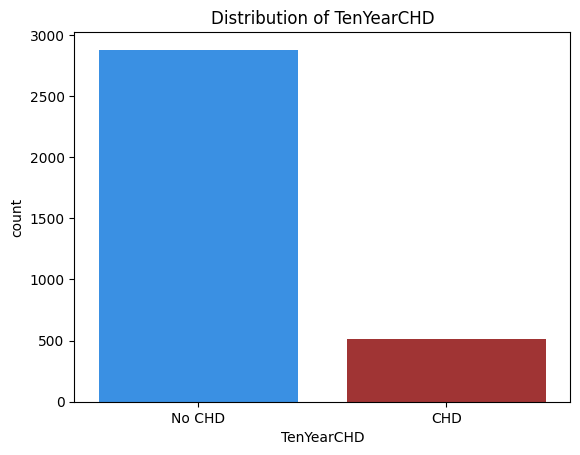

In [14]:
print(df['TenYearCHD'].value_counts(normalize=True))
sns.countplot(x='TenYearCHD', data=df, palette=['dodgerblue', 'firebrick'])
plt.xticks([0, 1], ['No CHD', 'CHD'])
plt.title('Distribution of TenYearCHD')
plt.show()

This distribution is imbalanced, with roughly **15%** of individuals expected to develop coronary heart disease (CHD) within 10 years, while about **85%** are not.

---

## Distributions of Numerical Features

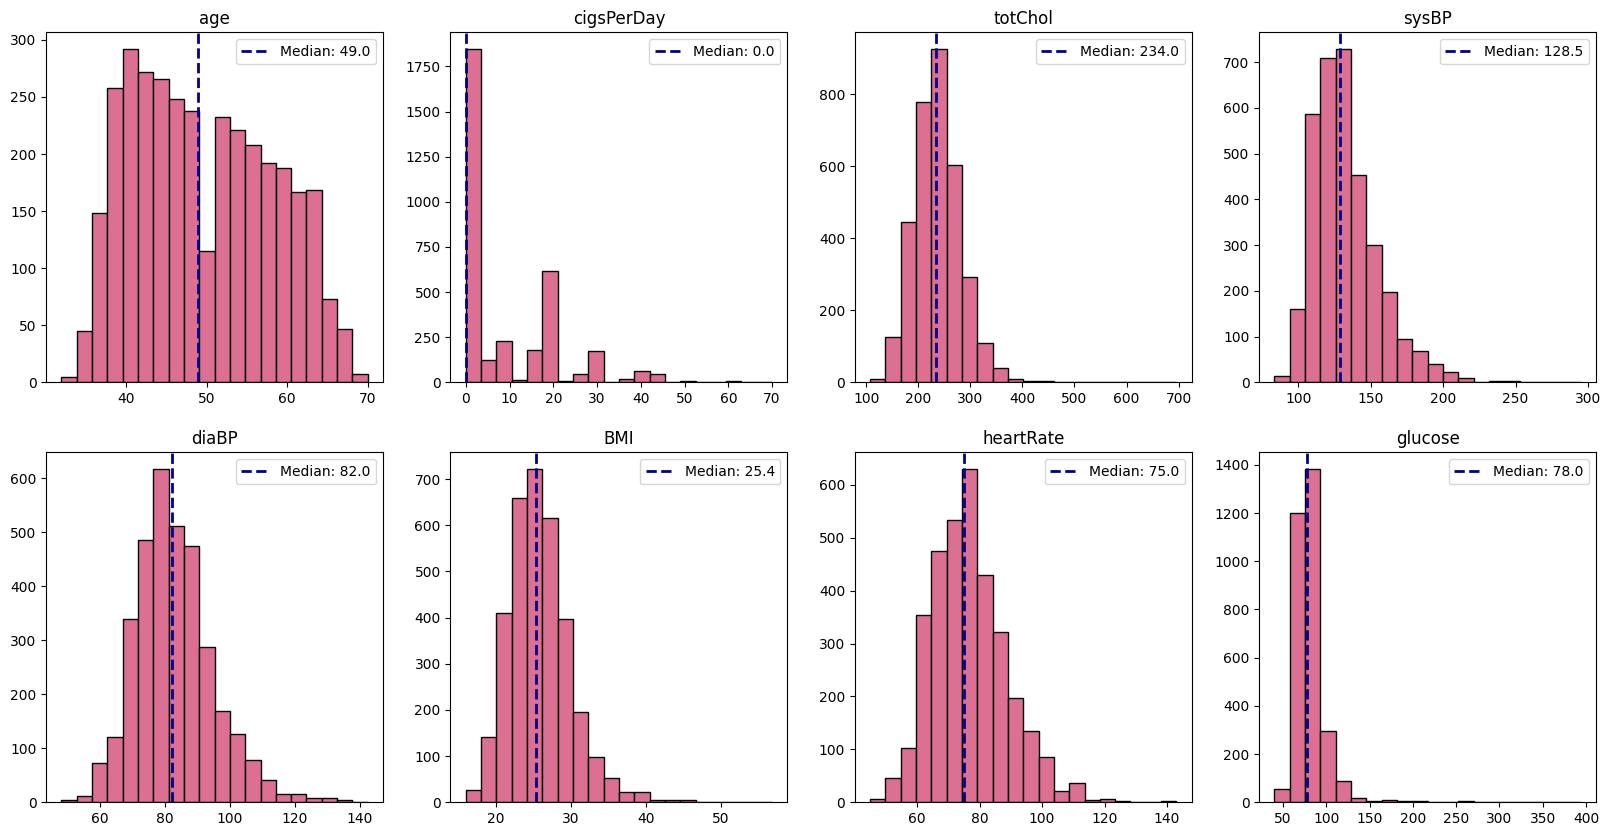

In [15]:
num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes_flat = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes_flat[i]
    ax.hist(df[col], bins=20, color='palevioletred', edgecolor='black')
    median_val = df[col].median()
    ax.axvline(median_val, color='darkblue', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    ax.set_title(col)
    ax.legend()
    
plt.show()


**Age**: The distribution is broad, with a median of 49, a significant numbers of participants are between their late 30s and late 60s.

**CigsPerDay**: With a median of 0, the vast majority of observations are clustered at 0 (non-smokers). The distribution takes on a right-skewed shape.

**TotalCholesterol**: Median at 234, with most values clustering around 150 and 300, and a tail extending towards higher cholesterol levels

**Systolic BP**: Relatively symmetric distribution around the median of 128.5 with the majority of individuals around 100-160 range.

**Diastolic BP**: A median of 82, values distributed around 60 and 100.

**BMI**: The median is at 25.4 suggesting that half of the participants are above this value, which is on the edge of the overweight category.

**HeartRate**: Median at 75 beats per minute, the majority of individuals around 60 to 90 beats per minute.

**Glucose**: The median of glucose is 78. However, the distribution is heavily right-skewed, indicating a significant number of individuals with a normal glucose levels, but also a tail representing individuals with elevated levels.

---

## Box Plots for Numerical Predictor Variables

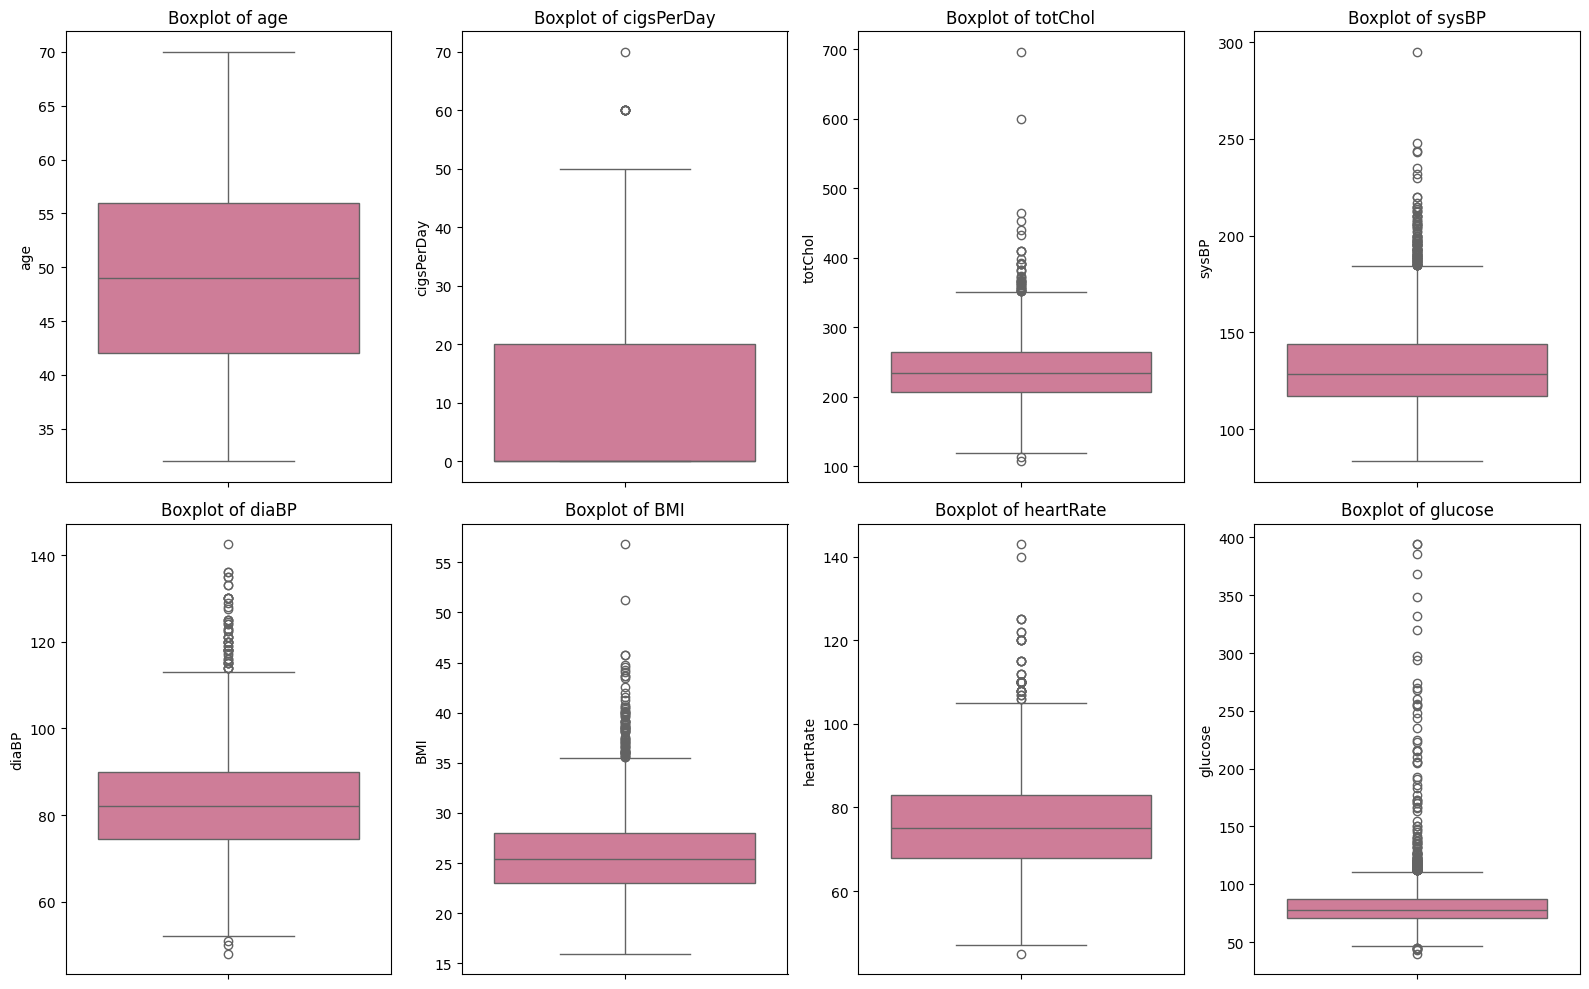

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes_flat = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes_flat[i]
    sns.boxplot(y=df[col], ax=ax, color='palevioletred')
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('') 

plt.tight_layout()
plt.show()

Many of the physiological measures show a number of outliers, particularly on the higher side. This will be important to consider during preprocessing.

---

## Bivariate Box Plots: TenYearCHD vs Numerical Predictors

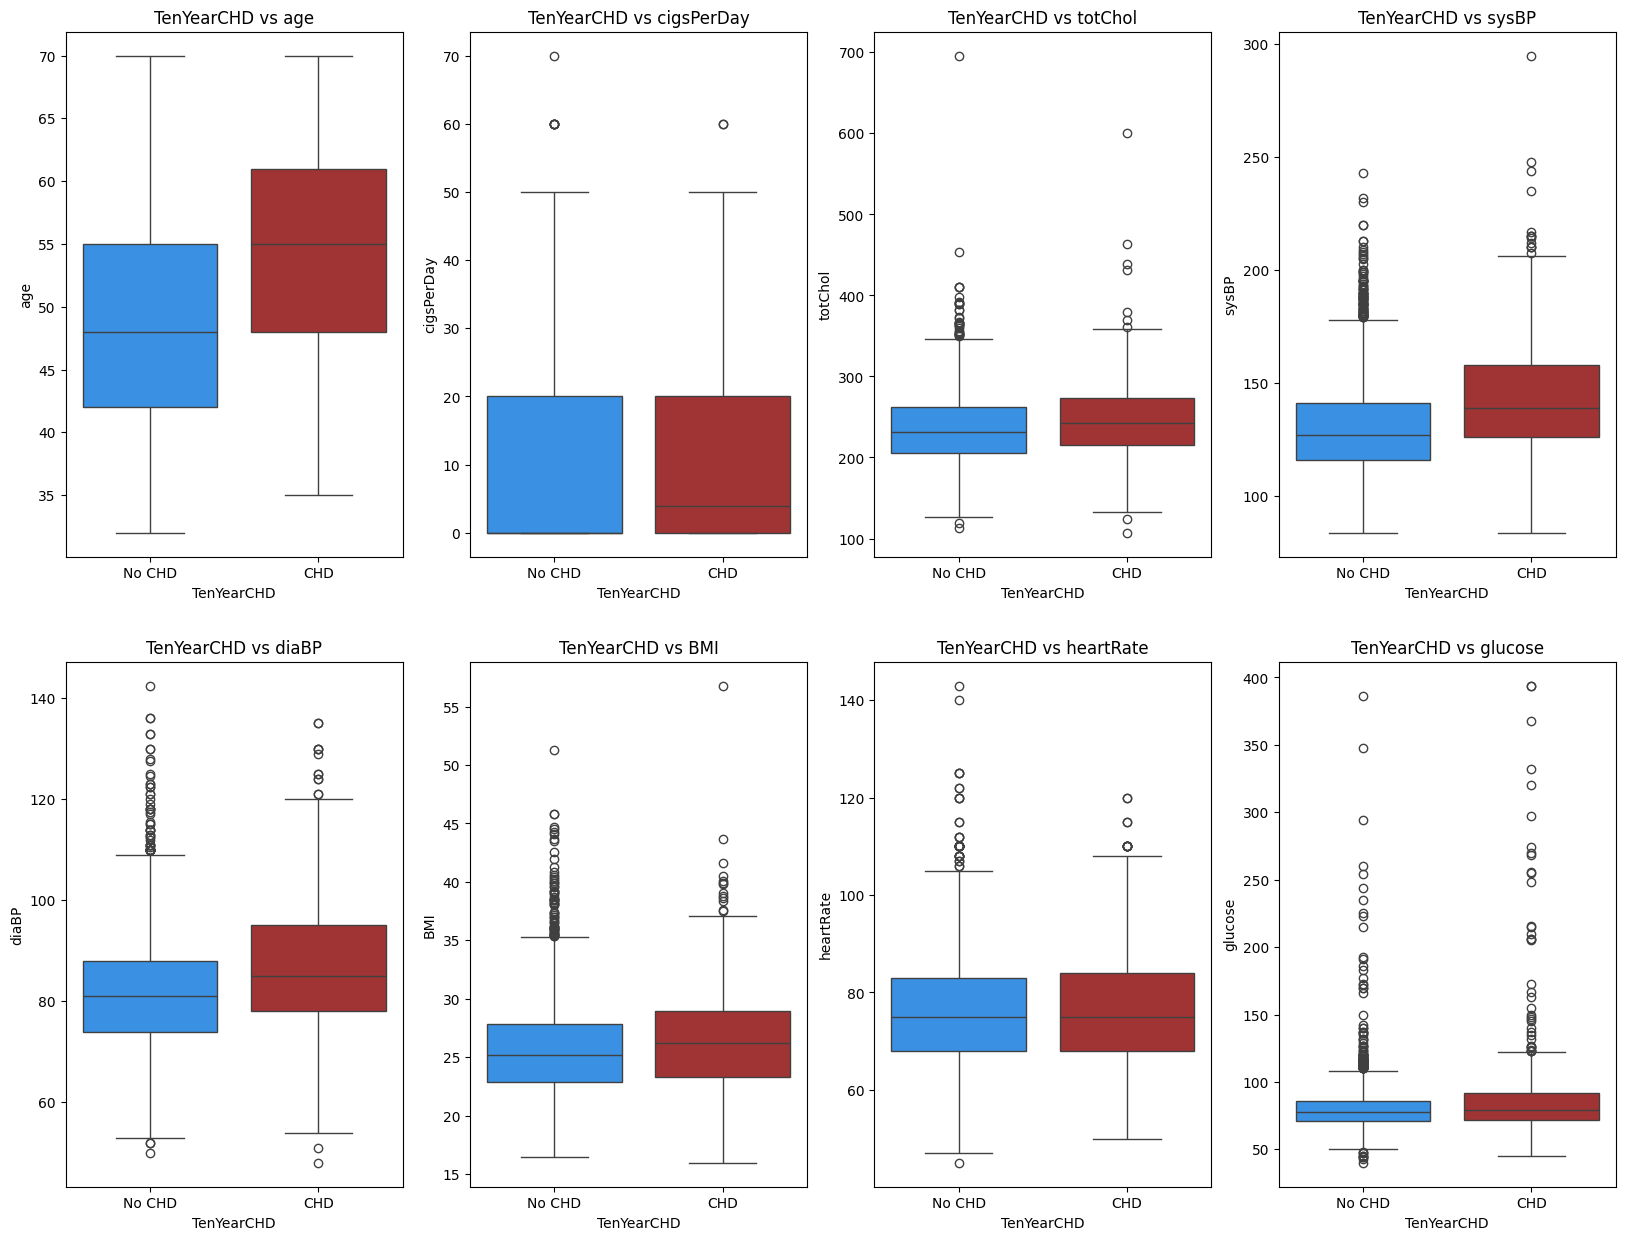

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
axes_flat = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes_flat[i]
    sns.boxplot(x='TenYearCHD', y=col, data=df, ax=ax, palette=['dodgerblue', 'firebrick'])
    ax.set_xticks([0, 1], ['No CHD', 'CHD'])
    ax.set_title(f'TenYearCHD vs {col}')

plt.show()

**Age**: Individuals who developed CHD tend to be older than average than those who did not. The median age for CHD is visibly higher and the entire IQR box is shifted upwards.

**CigsPerDay**: The median appears to be higher for individuals who developed CHD compared to those that did not. However, both groups show a wide spread, with many at 0 cigarettes.

**TotalCholesterol**: The median and the whole IQR box is higher in individuals with CHD.

**Systolic BP**: This metric appears to be significantly higher for individuals with CHD, with an elevated median and IQR.

**Diastolic BP**: Similarly to Systolic BP, this shows a tendency to be higher in the CHD group.

**BMI**: The median BMI and IQR is higher in individuals with CHD.

**HeartRate**: The distributions show considerable overlap. While the IQR is slightly broader for the CHD group, the medians appear to be highly similar.

**Glucose**: On average, glucose levels appear to be higher for the CHD group. However, there are numerous outliers in both groups, even in the higher end.

---

## Distributions of Categorical Predictor Variables

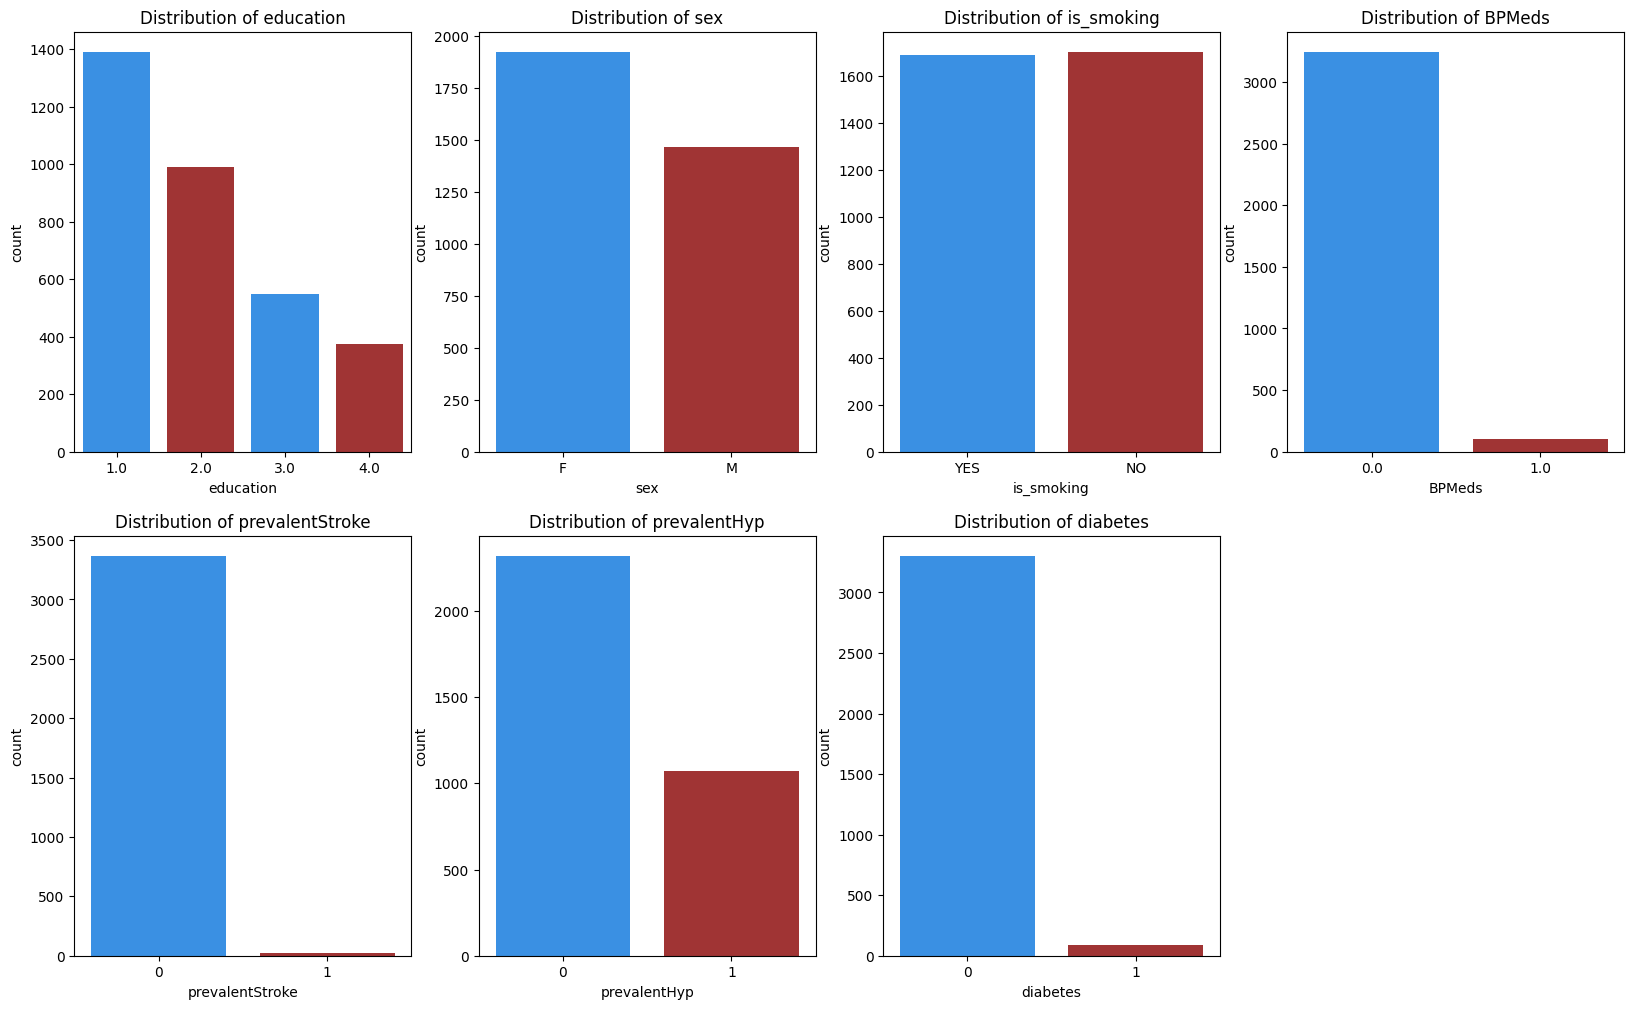

In [18]:
cat_cols = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes_flat = axes.flatten()

for i, ax_plot in enumerate(axes_flat):
    if i < len(cat_cols):
        sns.countplot(x=cat_cols[i], data=df, ax=ax_plot, palette=['dodgerblue', 'firebrick'])
        ax_plot.set_title(f'Distribution of {cat_cols[i]}')
    else:
        ax_plot.axis('off')

plt.show()

These initial findings show the general structure of the dataset regarding categorical factors. Some variables show a clear majority in one category *(BPMeds, prevalentStroke, diabetes)* while other have more varied distributions *(sex, is_smoking, education)*. This gives context as to how these factors might relate to CHD risk.

---

## Bivariate Categorical Plots: TenYearCHD vs Categorical Predictors

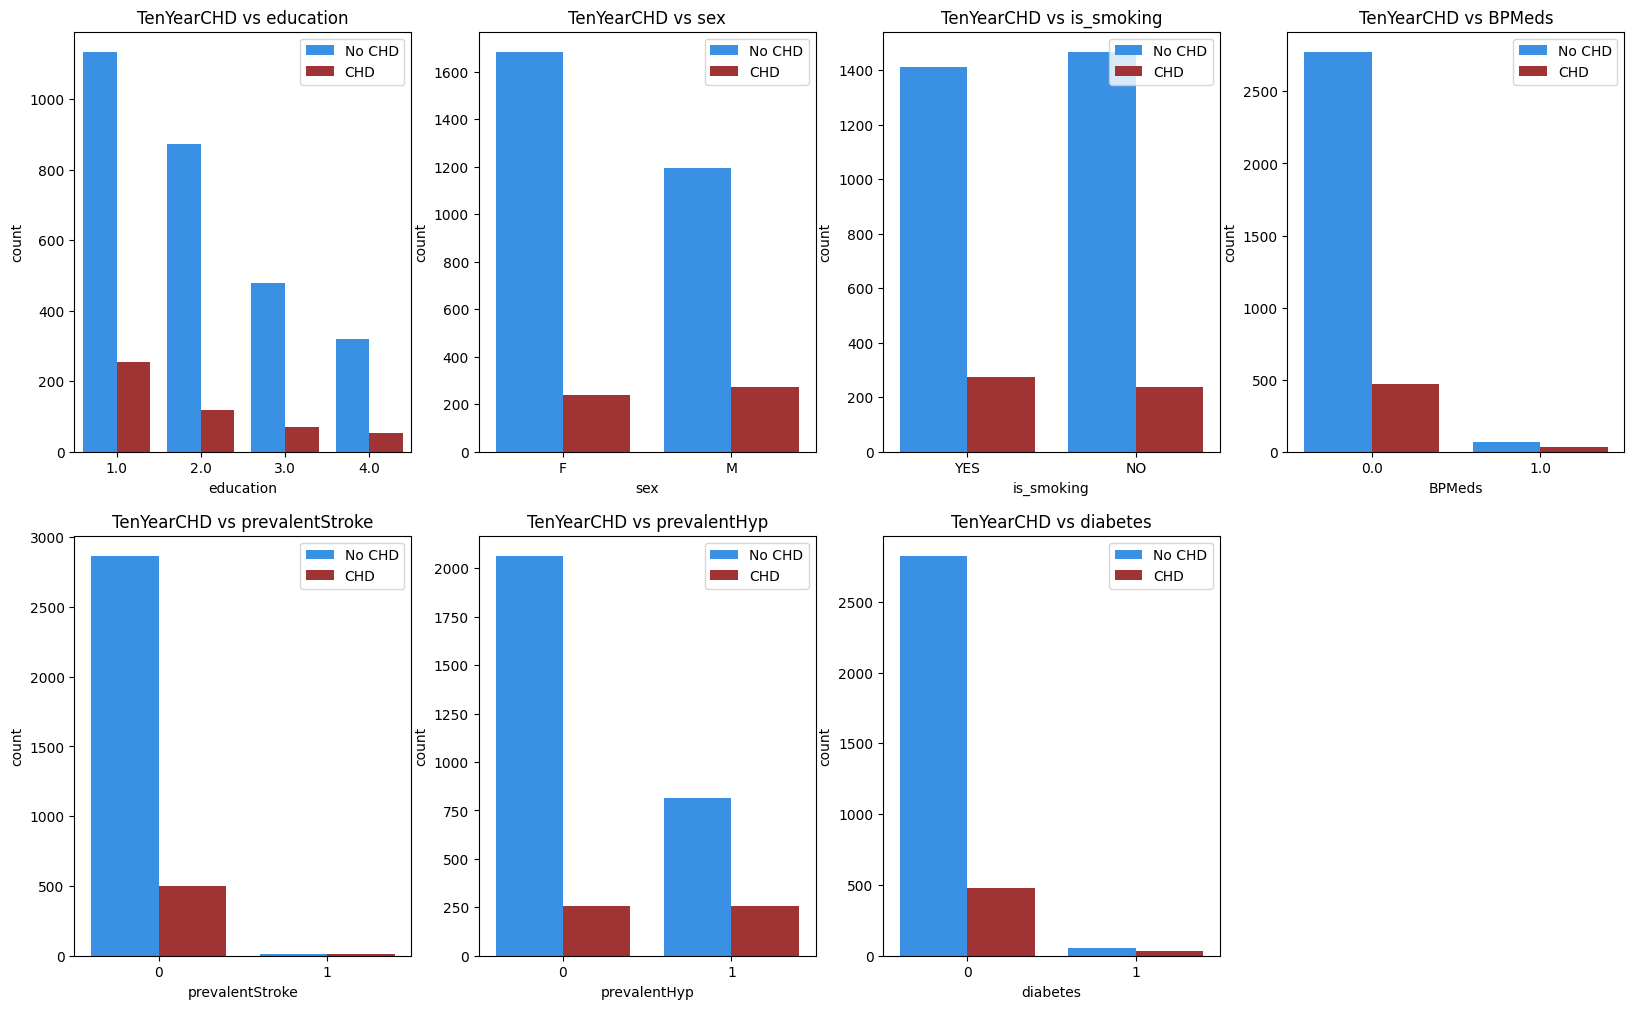

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes_flat = axes.flatten()

for i, ax_plot in enumerate(axes_flat):
    if i < len(cat_cols):
        sns.countplot(x=cat_cols[i], data=df, hue='TenYearCHD', ax=ax_plot, palette=['dodgerblue', 'firebrick'])
        ax_plot.set_title(f'TenYearCHD vs {cat_cols[i]}')
        ax_plot.legend(title='', loc='upper right', labels=['No CHD', 'CHD'])
    else:
        ax_plot.axis('off')

plt.show()

**CHD vs Education**: The plot shows CHD risk distribution across different education levels. With each increased level of education, the amount of individuals with CHD and non-CHD drops, which appears to be normal.

**CHD vs Sex**: This dataset has more females than males, but observing this plot we can see that the proportion of males that developed CHD is higher than in females. This leads to believe that males are prone to CHD more than females.

**CHD vs Smoker**: The amount of smokers vs non-smokers in this dataset is balanced; **1687 vs 1703** respectively. The bar for smokers that have CHD is higher than non-smokers with CHD, suggesting smoking is associated with higher proportion of CHD cases.

**CHD vs Blood Pressure Meds**: The vast majority of individuals are not on BP meds. But those people that are on BP meds, are more prone to CHD. **~1 in 3 on BP meds have CHD, opposed to ~1 in 6 not on BP meds.**

**CHD vs Stroke**: Most individuals have no history of prior stroke, but those who do are high CHD risk. **22** people had a stroke, **10** of them have CHD risk.

**CHD vs Hypertension**: Significant number of individuals have hypertension. The proportion of people who developed CHD is visibly higher in the hypertensive group. This suggests that hypertension is a major risk factor for CHD.

**CHD vs Diabetes**: Majority of cases do not have diabetes. Those with diabetes, although fewer in number, have a significantly higher proportion of CHD than those without diabetes. This highlights diabetes as a strong risk factor.

---

## Correlation Matrix Heatmap

<Axes: >

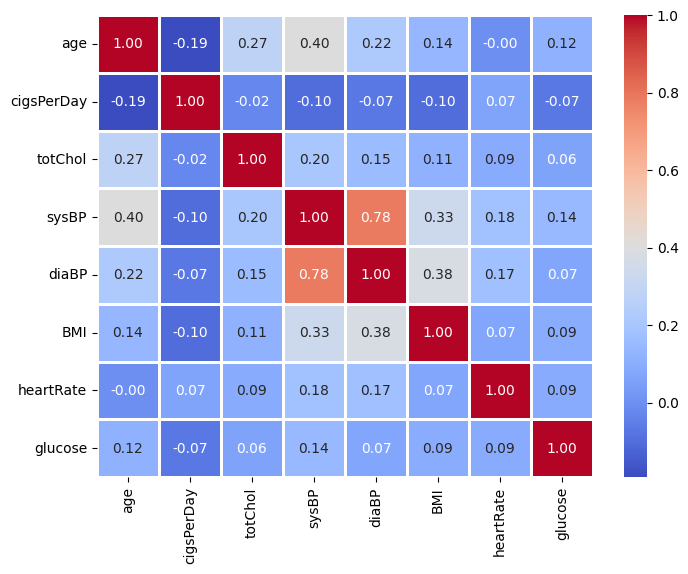

In [20]:
plt.figure(figsize=(8,6))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.9)   

**Positive Correlations**:
- **Systolic BP vs Diastolic BP**: coefficient of 0.78. This is expected since both measure blood pressure and rise and fall together. This is an instance of **multicollinearity**.

- **Age vs Systolic BP**: coefficient of 0.40. This suggests that Systolic blood pressure tends to increase with age.

- **BMI vs Diastolic BP and Systolic BP**: Diastolic (0.38) and Systolic (0.33) show moderate positive correlations, indicating that higher BMI is associated with increased blood pressure.

Other features showcased quite weak correlations. Overall, no other pairs of variables show extremely high correlations (>0.8 or <-0.8)

---

# Data Preprocessing

### Train-Test Split

In [21]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=52, stratify=y
)

print(f'Original X shape: {X.shape}')
print(f'Original y shape: {y.shape}')
print('-----------------------------')
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

print(f'\nProportion of CHD in y_train: {y_train.value_counts(normalize=True)}')
print(f'\nProportion of CHD in y_test: {y_test.value_counts(normalize=True)}')

Original X shape: (3390, 15)
Original y shape: (3390,)
-----------------------------
X_train shape: (2712, 15)
X_test shape: (678, 15)
y_train shape: (2712,)
y_test shape: (678,)

Proportion of CHD in y_train: TenYearCHD
0    0.849189
1    0.150811
Name: proportion, dtype: float64

Proportion of CHD in y_test: TenYearCHD
0    0.849558
1    0.150442
Name: proportion, dtype: float64


---

### Feature Selection

In [22]:
num_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']

cat_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

X_train = X_train.drop('diaBP', axis=1)
X_test = X_test.drop('diaBP', axis=1)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (2712, 14)
X_test shape: (678, 14)


Decided to drop the **diaBP** feature, since it suffers from multicollinearity. Also, we still have the Systolic blood pressure, which accounts for the missing Diastolic blood pressure.

---

**Skills/Tools**

### Data Transformation Pipelines

In [23]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

**SimpleImputer**: this is used to fill the missing values in the data. *Median* is used for numerical columns and *Most Frequent* for categorical columns.
***
At first I used **StandardScaler**, but after testing, **RobustScaler** produced better results.

**StandardScaler**: standardizes numerical features by transforming them to have a mean of 0 and a standard deviation of 1. This makes sure all features are on a similar scale and ensures that inherently large values do not dominate the model.

The formula used by **StandardScaler**:

$
StandardScaledValue = (OriginalValue - Mean)  /  StandardDeviation
$

**RobustScaler**: also standardizes numerical features, but it does so by having its median centered (or close to) 0, and the bulk of the data scaled based on the IQR. This makes the **RobustScaler** less affected by extreme values in the dataset.

$
RobustScaledValue = (OriginalValue - Median) / (Q3 - Q1)
$
***
**OneHotEncoder**: converts categorical variables into a numerical representation by creating new binary variables (0 or 1).

---

### Preprocessor Workflow

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ],
    remainder='drop'
)

---

# Model Development

### Logistic Regression Model

In [25]:
log_model = LogisticRegression(
    solver='liblinear',
    random_state=52
)

---

### Pipeline for Tuning with SMOTE

In [26]:
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=52, k_neighbors=4)),
    ('classifier', log_model)
])

**ImbPipeline** used due to **SMOTE** and **GridSearchCV** compatibility.

**SMOTE** (Synthetic Minority Over-sampling Technique) is a method to address class imbalance, in this case the **'CHD'** class. Instead of duplicating minority class samples, **SMOTE** creates new samples of the minority class.

---

### Model Fitting and Hyperparameter Tuning with GridSearchCV

In [27]:
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(
    model_pipeline,
    param_grid,
    scoring='roc_auc',
    cv=5
)

grid_search.fit(X_train, y_train)

print("Best C from GridSearchCV:", grid_search.best_params_['classifier__C'])
print(f"Best ROC AUC from GridSearchCV: {grid_search.best_score_:.4f}")

best_model_pipeline = grid_search.best_estimator_

Best C from GridSearchCV: 0.01
Best ROC AUC from GridSearchCV: 0.7222


Regarding **GridSearchCV**, the results mean that on average, across 5 validation folds (cv=5) within the training data, a **C** value of **0.01** for the logistic regression model gave the best ROC AUC performance.


*Small C value (0.01) = large regularization penalty, this leads to smaller coefficients and a simpler model.*
 
*Large C value (100) = small regularization penalty, this leads to larger coefficients and a more complex model.*

---

# Model Evaluation

### Predictions on the Test Set

In [28]:
y_pred = best_model_pipeline.predict(X_test) # Label prediction

y_pred_proba = best_model_pipeline.predict_proba(X_test)[:, 1] # Probability prediction

print("First 5 predicted labels:", y_pred[:5])
print("\nFirst 5 predicted probabilities for CHD=1:", y_pred_proba[:5])

First 5 predicted labels: [1 0 1 1 1]

First 5 predicted probabilities for CHD=1: [0.76111705 0.26270726 0.76253909 0.52889969 0.63707219]


The threshold for CDC=1(YES) is 0.5. We can see this is reflected via the predicted probabilities.

---

## Performance metrics with 0.5 threshold

### Confusion Matrix

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[382 194]
 [ 38  64]]


This results in:

- True Negative = 382 (Predicted **CHD=0** while **CHD=0**) ✅
- False Positive = 194 (Predicted **CHD=1** while **CHD=0**) ⛔
- False Negative = 38 (Predicted **CHD=0** while **CHD=1**) ⛔ **<-- most important!**
- True Positive = 64 (Predicted **CHD=1** while **CHD=1**) ✅

---

### Accuracy

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6578


$
Accuracy = (True Positives + True Negatives) /  Total
$

Accuracy shows the total proportion of true predictions. But it can be highly misleading in imbalanced datasets.

---

### Precision

In [31]:
precision = precision_score(y_test, y_pred, zero_division=0)
print(f'Precision: {precision:.4f}')

Precision: 0.2481


$
Precision = True Positives / (True Positives + False Positives)
$

Precision measures the proportion of correctly predicted positive cases (CHD) out of all cases the model predicted as positive. A high precision indicates that the model makes few false positive errors (false alarms).

---

### Recall

In [32]:
recall = recall_score(y_test, y_pred, zero_division=0)
print(f'Recall: {recall:.4f}')

Recall: 0.6275


$
Recall = True Positives / (True Positives + False Negatives)
$

Recall measures the proportion of actual positive cases (CHD) that the model correctly identified. A high recall means the model misses few true cases, minimizing false negatives. This is a very important metric for medical diagnostic tasks.

---

### F1 Score

In [33]:
f1 = f1_score(y_test, y_pred, zero_division=0)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.3556


$
F1 = 2 * (Precision * Recall) / (Precision + Recall)
$

F1-score tries to find the balance between **Precision** and **Recall**. Since both of these metrics often have an inverse relationship, the F1 score provides a single number that summarizes both.

---

## ROC AUC Score (Area Under the Curve of Receiver Operating Characteristic)

In [34]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')

ROC AUC Score: 0.7001


This measure informs about the model's overall ability to discriminate between classes (CHD vs. non-CHD). 

We have ROC AUC Score of around ~0.7. This means there's a **70%** chance that if we randomly pick a patient who will develop CHD and one who won't, the model will assign  a higher risk score to the patient who will develop CHD.

---

## Optimal Threshold and F1 Score

In [35]:
precision_vals, recall_vals, threshold_pr = precision_recall_curve(y_test, y_pred_proba)

epsilon = 1e-10
f1_scores_pr = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals + epsilon)

optimal_idx_pr = np.argmax(f1_scores_pr[:-1])
optimal_threshold_f1 = threshold_pr[optimal_idx_pr]
optimal_f1_score = f1_scores_pr[optimal_idx_pr]


print(f'Optimal threshold for F1 score: {optimal_threshold_f1:.4f}')
print(f'Optimal F1 score: {optimal_f1_score:.4f}')

Optimal threshold for F1 score: 0.4687
Optimal F1 score: 0.3704


---

## Precision-Recall Curve

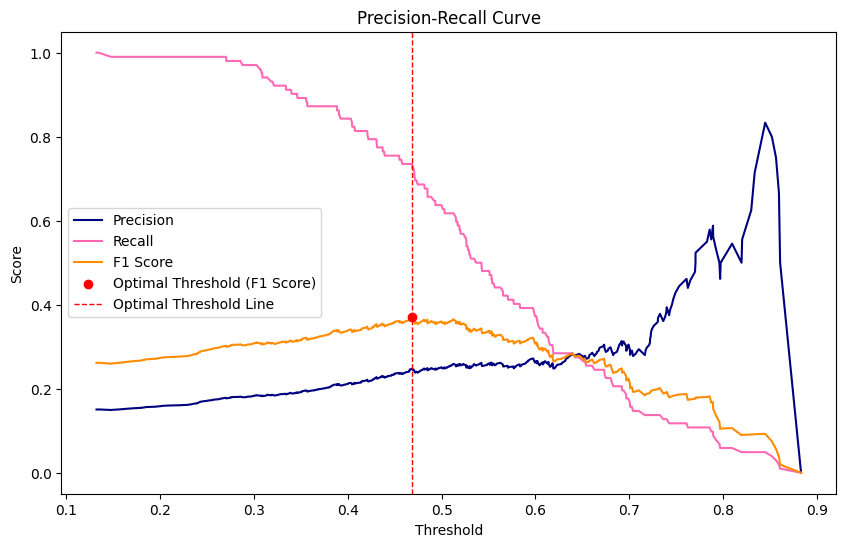

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(threshold_pr, precision_vals[:-1], label='Precision', color='navy')
plt.plot(threshold_pr, recall_vals[:-1], label='Recall', color='hotpink')
plt.plot(threshold_pr, f1_scores_pr[:-1], label='F1 Score', color='darkorange')
plt.scatter(optimal_threshold_f1, optimal_f1_score, color='red', zorder=2, label='Optimal Threshold (F1 Score)')
plt.axvline(x=optimal_threshold_f1, color='red', linestyle='--', label='Optimal Threshold Line', linewidth=1)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

---

## Optimal Performance Metrics

In [37]:
y_pred_optimal = (y_pred_proba >= optimal_threshold_f1).astype(int)

print(f'Optimal Threshold: {optimal_threshold_f1:.4f}')

conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
print(f'\nOptimal Confusion Matrix:\n {conf_matrix_optimal}')

accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f'\nOptimal Accuracy: {accuracy_optimal:.4f}')

precision_optimal = precision_score(y_test, y_pred_optimal)
print(f'\nOptimal Precision: {precision_optimal:.4f}')

recall_optimal = recall_score(y_test, y_pred_optimal)
print(f'\nOptimal Recall: {recall_optimal:.4f}')

f1_optimal = f1_score(y_test, y_pred_optimal)
print(f'\nOptimal F1-score: {f1_optimal:.4f}')


Optimal Threshold: 0.4687

Optimal Confusion Matrix:
 [[348 228]
 [ 27  75]]

Optimal Accuracy: 0.6239

Optimal Precision: 0.2475

Optimal Recall: 0.7353

Optimal F1-score: 0.3704


This results in the following results:

    - Optimal Threshold: 0.4687

    - Optimal Confusion Matrix:
      [[348 228] [ 27  75]]

    - Optimal Accuracy: 0.6239

    - Optimal Precision: 0.2475

    - Optimal Recall: 0.7353

    - Optimal F1-score: 0.3704

---

## Further Model Experiments and Rationale for Metric Focus

For predicting CHD risk, a key challenge is balancing the need to correctly identify individuals who will develop the disease (maximizing **Recall**) against the need to avoid incorrectly flagging healthy individuals (maintaining good **Precision**). Missing a true CHD case (a False Negative) can have severe clinical consequences, often making Recall a metric of higher importance in this context. However, maximizing Recall by simply lowering the decision threshold can lead to a very low Precision, resulting in a large number of false positives and potentially unnecessary follow-up procedures.

For the purposes of this project, to find a balance between the two was attempted, while giving Recall more importance. If there would be a need to maximize Recall, methods like setting a custom threshold could be used. For example if this model would be coupled with another method that detect false positives, this would be a viable strategy.

**Experimental iterations**:

- Log transform certain features before feeding them to a Scaler.

- Different SMOTE parameters, specifically changing k-neighbors.

- Undersampling techniques.

- Differing GridSearchCV parameters.

- Removing certain features.

Changes in these resulted in worse results (e.g. low **ROC AUC**) or high sacrifices in **Recall** or **Precision**.

---

During experimentation, settings that would maximize Recall (but sacrifice Precision) were discovered:

1. Change **RobustScaler** to **StandardScaler**

2. Lowering the optimal threshold to a desired level.

This results in the following:

    - Optimal Threshold: 0.4260

    - Optimal Confusion Matrix:
      [[308 268] [ 21  81]]

    - Optimal Accuracy: 0.5737

    - Optimal Precision: 0.2321

    - Optimal Recall: 0.7941

    - Optimal F1-score: 0.3592

---

# Model Interpretation

## Model Intercept and Baseline

In [38]:
trained_model = best_model_pipeline.named_steps['classifier']

coeffs = trained_model.coef_[0]
intercept = trained_model.intercept_[0]

print('Model Intercept:')
print(f'Log-Odds: {intercept:.4f}, Odds Ratio: {np.exp(intercept):.4f}')

Model Intercept:
Log-Odds: -0.5016, Odds Ratio: 0.6056


According to this, as baseline individual has approximately **39.5%** lower odds of developing CHD compared to an individuals whose odds are even.

A baseline individual is someone who:

- Is of median **Age**, has median **Cigarettes per day**, and metrics like **Cholesterol**, **Systolic BP**, **BMI**, **HeartRate** and **Glucose** are all median (from the dataset)
- Is **Female**
- Is a **non-smoker**
- Has education level of **1.0**
- Is NOT on **BP** medication
- Has NO **stroke** history
- Has NO **hypertension** history
- Does NOT have **diabetes**

---

## Analyzing Feature Impact via Coefficients and Odds Ratios

In [39]:
f_preprocessor = best_model_pipeline.named_steps['preprocessor']

one_hot = f_preprocessor.named_transformers_['cat'].named_steps['onehot']
one_hot_names = list(one_hot.get_feature_names_out(cat_features))

final_names = num_features + one_hot_names

# Coefficient DataFrame
coeffs_df = pd.DataFrame({
    'Feature': final_names,
    'Coefficient (Log-Odds)': coeffs
})

coeffs_df['Odds Ratio'] = np.exp(coeffs_df['Coefficient (Log-Odds)'])

coeffs_df = coeffs_df.sort_values(by='Odds Ratio', ascending=False)

coeffs_df


,Feature,Coefficient (Log-Odds),Odds Ratio
0,age,0.733624,2.082614
1,cigsPerDay,0.357667,1.429989
3,sysBP,0.347868,1.416046
10,sex_M,0.206851,1.229800
11,is_smoking_YES,0.130001,1.138830
2,totChol,0.125836,1.134097
6,glucose,0.085846,1.089638
14,prevalentHyp_1,0.067107,1.069410
13,prevalentStroke_1,0.063875,1.065959
15,diabetes_1,0.008959,1.008999


- **Age** (Coeff: 0.7339, Odds Ratio: 2.0826)
    - One of the strongest predictors. For every IQR **(14 years)** increase in **age**, the odds of developing CHD increase by **~108.3%** holding other factors constant. This highlights that **age** is the factor with the most risk.

- **CigsPerDay** (Coeff: 0.3576, Odds Ratio: 1.4300)
    - An IQR increase in **cigarettes smoked per day** **(20 cigs/day)** is associated with **43%** increase in the odds of developing CHD.

- **Systolic BP** (Coeff: 0.3478, Odds Ratio: 1.4160)
    - IQR increase in **systolic blood pressure** **(27 mmHg)** is linked with an increase of **41.6%** in the odds of developing CHD.

- **Male** (Coeff: 0.2068, Odds Ratio: 1.2298)
    - **Males** have around **23%** higher odds of developing CHD as opposed to **Females**.

- **Smokers** (Coeffs: 0.1300, Odds Ratio: 1.1388)
    - Active **smokers** have about **13.9%** higher odds of CHD compared to **non-smokers**.

- **Total Cholesterol** (Coeffs: 0.1258, Odds Ratio: 1.1340)
    - An IQR increase in **total cholesterol** **(58 mg/dL)** increases odds of developing CHD by **13.4%**.

- **Glucose** (Coeffs: 0.0858, Odds Ratio: 1.0896)
    - For **glucose** level increase by IQR **(16 mg/dL)** increases the odds of CHD by about **9%**. 

- **Hypertension** (Coeffs: 0.0671, Odds Ratio: 1.0694)
    - Having **hypertension** is associated with about **6.9%** increase in odds of CHD.

- **Stroke** (Coeffs: 0.0638, Odds Ratio: 1.0659)
    - Individuals with a **stroke** history have an estimated **6.6%** higher odds of developing CHD.

- **Diabetes** (Coeffs: 0.0089, Odds Ratio: 1.0090)
    - Having **diabetes** is linked to a very small increase of 0.9% in the odds of developing CHD.

- **BMI** (Coeffs: 0.0081, Odds Ratio: 1.0081)
    - IQR increase in **BMI (5.02 units)** is associated with a minimal **0.8%** increase in the odds of CHD in this model.

- **BP Meds** (Coeffs: -0.0053, Odds Ratio: 0.9946)
    - Being on **BP medication** shows a negligible effect, linked to a slight decrease of **0.5%**.

- **Heart Rate** (Coeffs: -0.0599, Odds Ratio: 0.9417)
    - An IQR increase in **heart rate (15 bpm)** is associated with an approximate **5.8%** decrease in the odds of CHD. 

- **Education Level 2** (Coeffs: -0.2700, Odds Ratio: 0.7633)
    - Associated with around **23.7%** decrease in odds of CHD.

- **Education Level 3** (Coeffs: -0.1794, Odds Ratio: 0.8357)
    - Associated with around **16.4%** decrease in odds of CHD.

- **Education Level 4** (Coeffs: -0.1796, Odds Ratio: 0.8355)
    - Associated with around **16.4%** decrease in odds of CHD.

**Coefficients - Key insights**

- **Dominant Risk Factors**: ***Age***, ***CigsPerDay*** and ***sysBP*** consistently show the strongest positive association with increased CHD risk. Being a ***male*** is also a notable factor.

- **Effect of Education**: higher level of ***education*** is linked with lower odds of CHD.

- **Diabetes**: this metric shows a surprisingly low association with CHD risk. The small magnitude in this model likely indicates that other factors (***glucose, BMI, prevalentHyp***) are already capturing a significant portion of the risk associated with diabetes.

- **Other Factors**: ***totChol*** and ***glucose*** appear to show moderate positive associations. ***prevalentStroke*** and ***prevalentHyp*** show smaller positive associations, this is possibly due to other measures like ***sysBP*** and ***age*** being more dominant.

- **Weak Effects**: ***BMI***, ***heartRate*** and ***BPMeds*** show minimal or slightly counterintuitive influence, suggesting that their independent impact on CHD risk is limited once other variables are considered.

---

# Conclusion

## Actionable Insights

1. **Reinforcement of Known Risk Factors**: The model confirms the significant impact of risk factors like increasing **age**, higher **systolic blood pressure** and **smoking** (**cigsPerDay**, **is_smoking_YES**) on the 10-year risk of CHD. This highlights the continued importance of public health initiatives and health advice that are focused on regulating these factors.

2. **Education as a Factor**: The model's findings show that higher education is associated with lower CHD risk. While this is not directly actionable, it points to a broader socio-economic determinants of health that are relevant for population wide health policies.

3. **Screening Potential**: With a Recall of around **73.5%**, the model could serve as an initial method for screening a substantial portion of individuals who have a higher risk of CHD. Those who would be flagged could undergo more complex and specific clinical assessments. However, low level of Precision is a problem, any such screening would need to be coupled with secondary confirmation processes in order to manage the high number of false positives.

---

## Limitations

1. **Correlation vs. Causation**: This model identifies statistical links between predictors and CHD risk. However, these associations do not necessarily imply causal relationships.

2. **Generalizability**: The model itself was trained and evaluated on a specific dataset. Model's performance on differing populations or geographical settings may vary.

3. **Performance**: Recall of **73.5%** is a positive outcome, but Precision of **24.75%** is low, resulting in a modest F1-score of **~0.37**. This results in a high rate of false positives, which is a problem in a clinical setting without follow-up procedures. The ability to discriminate between classes, which is measured by ROC AUC, is **~0.70**, this is a fair result but suggests room for improvement.

4. **Data Limitations**:
    - The dataset size of **3390** samples is moderate and might limit the ability to detect more complex interactions effectively.

    - The dataset itself might not have all the relevant risk factors for CHD. Examples like dietary habits, family health history and physical activity levels are all missing. Inclusion of such information could lead to further insights and improve model performance.

    - Since the dataset had missing data, imputation was used to fill the blanks. This can introduce some level of bias.

5. **Model Simplicity**: Logistic regression is a linear model, which may not capture complex non-linear relationships between features.

---

## Further Improvements

- **Data Enrichment**: If possible, incorporating more data with relevant features known to be associated with increased CHD risk could significantly enhance predictive power.

- **Weak Coefficients**: Some features showed surprisingly weak effects in this model. Further investigation could be done that explores interactions more deeply and considers if their impact is mediated by other variables in the model.

- **Other Models**: Exploring non-linear models could capture more complex relationships and lead to improved performance metrics.

---

### [Back to the Top    ⬆](#regression-cardiovascular-disease-prediction)